In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import math
import os

from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

In [2]:
# df_china = pd.read_csv('output/merged_china.csv')
# df_us = pd.read_csv('output/merged_us.csv')
# df_india = pd.read_csv('output/merged_india.csv')

# df_raw_owid = pd.read_csv('dataset/owid/owid-co2-data.csv')
# df_raw_ghg = pd.read_csv('dataset/owid/ghg-emissions-by-sector.csv')
df_raw_worldbank = pd.read_csv('dataset/worldbank/API.csv')
# df_worldbank_meta_country = pd.read_csv('dataset/worldbank/Metadata_Country_API_19_DS2_en_csv_v2_3159902.csv')
df_raw_worldbank_transposed = pd.read_csv('output/dataset_worldbank_transposed.csv')

df_worldbank_imputed = pd.read_csv('output/dataset_worldbank_imputed.csv')

## Overall process

### EDA
EDA for imputed dataset

### Preprocessing (again)
1. Identify null value
2. Overlapping columns (or indicators)
2. Imputation 
    - woid (imputation drop columns)
    - worldbank (imputation
3. Data transformation

reference: [5 stages of data prep for k-means](https://medium.com/@evgen.ryzhkov/5-stages-of-data-preprocessing-for-k-means-clustering-b755426f9932)


### K-Means
- Euclidean K Means
- DBA K Means
- Soft DTW K Means

## EDA
For imputed dataset

In [3]:
df_worldbank_imputed

Country Name  Year  Urban population (% of total population)  \
0            Aruba  1960                                    50.776   
1            Aruba  1961                                    50.761   
2            Aruba  1962                                    50.746   
3            Aruba  1963                                    50.730   
4            Aruba  1964                                    50.715   
...            ...   ...                                       ...   
15550     Zimbabwe  2016                                    32.296   
15551     Zimbabwe  2017                                    32.237   
15552     Zimbabwe  2018                                    32.209   
15553     Zimbabwe  2019                                    32.210   
15554     Zimbabwe  2020                                    32.242   

       Population growth (annual %)  Methane emissions (kt of CO2 equivalent)  \
0                          2.236956                             283582.812062   
1                          2.236462                             283587.734583   
2                          1.432843                             284129.727802   
3                          0.823502                             284541.787631   
4                          0.580334                             284708.320902   
...                             ...                                       ...   
15550                      1.549294                              11380.000000   
15551                      1.459406                              11560.000000   
15552                      1.410382                              11850.000000   
15553                      1.421142                             288200.157048   
15554                      1.473871                             288158.211831   

       CO2 intensity (kg per kg of oil equivalent energy use)  \
0                                               2.863780        
1                                               2.845711        
2                                               2.773063        
3                                               2.713592        
4                                               2.679012        
...                                                  ...        
15550                                           1.421314        
15551                                           1.396264        
15552                                           1.374632        
15553                                           1.383937        
15554                                           1.370411        

       Energy use (kg of oil equivalent per capita)  
0                                       1072.819624  
1                                       1072.819624  
2                                       1072.819624  
3                                       1072.819624  
4                                       1072.819624  
...                                             ...  
15550                                   1072.819624  
15551                                   1072.819624  
15552                                   1072.819624  
15553                                   1072.819624  
15554                                   1072.819624  

[15555 rows x 7 columns]

In [4]:
df_worldbank_imputed.describe()

Year  Urban population (% of total population)  \
count  15555.000000                              15555.000000   
mean    1990.000000                                 49.301897   
std       17.607383                                 24.320978   
min     1960.000000                                  2.077000   
25%     1975.000000                                 29.322500   
50%     1990.000000                                 47.633000   
75%     2005.000000                                 68.296500   
max     2020.000000                                100.000000   

       Population growth (annual %)  Methane emissions (kt of CO2 equivalent)  \
count                  15555.000000                              1.555500e+04   
mean                       1.788455                              2.842165e+05   
std                        1.457642                              7.346726e+05   
min                       -6.766133                              0.000000e+00   
25%                        0.797502                              4.066310e+03   
50%                        1.798754                              3.295000e+04   
75%                        2.633327                              2.862609e+05   
max                       17.633410                              8.174420e+06   

       CO2 intensity (kg per kg of oil equivalent energy use)  \
count                                       15555.000000        
mean                                            2.270701        
std                                             1.767383        
min                                             0.000000        
25%                                             1.765106        
50%                                             2.214089        
75%                                             2.683607        
max                                           103.157895        

       Energy use (kg of oil equivalent per capita)  
count                                  15555.000000  
mean                                    1591.261103  
std                                     1803.681703  
min                                        9.548060  
25%                                     1039.609428  
50%                                     1072.819624  
75%                                     1111.666802  
max                                    22120.430300

In [5]:
df_raw_worldbank

Country Name Country Code  \
0            Aruba          ABW   
1            Aruba          ABW   
2            Aruba          ABW   
3            Aruba          ABW   
4            Aruba          ABW   
...            ...          ...   
20211     Zimbabwe          ZWE   
20212     Zimbabwe          ZWE   
20213     Zimbabwe          ZWE   
20214     Zimbabwe          ZWE   
20215     Zimbabwe          ZWE   

                                          Indicator Name     Indicator Code  \
0               Urban population (% of total population)  SP.URB.TOTL.IN.ZS   
1                                       Urban population        SP.URB.TOTL   
2                     Urban population growth (annual %)        SP.URB.GROW   
3                                      Population, total        SP.POP.TOTL   
4                           Population growth (annual %)        SP.POP.GROW   
...                                                  ...                ...   
20211  Rural land area where elevation is below 5 met...  AG.LND.EL5M.RU.ZS   
20212  Rural land area where elevation is below 5 met...  AG.LND.EL5M.RU.K2   
20213                       Arable land (% of land area)     AG.LND.ARBL.ZS   
20214                 Agricultural land (% of land area)     AG.LND.AGRI.ZS   
20215                         Agricultural land (sq. km)     AG.LND.AGRI.K2   

            1960           1961           1962           1963           1964  \
0         50.776      50.761000      50.746000      50.730000      50.715000   
1      27525.000   28139.000000   28537.000000   28763.000000   28922.000000   
2            NaN       2.206183       1.404498       0.788835       0.551271   
3      54208.000   55434.000000   56234.000000   56699.000000   57029.000000   
4            NaN       2.236462       1.432843       0.823502       0.580334   
...          ...            ...            ...            ...            ...   
20211        NaN            NaN            NaN            NaN            NaN   
20212        NaN            NaN            NaN            NaN            NaN   
20213        NaN       4.872690       5.001939       5.131188       5.260437   
20214        NaN      28.396019      28.615743      28.835466      29.055189   
20215        NaN  109850.000000  110700.000000  111550.000000  112400.000000   

                1965  ...           2011           2012           2013  \
0          50.700000  ...      42.940000      42.957000      42.990000   
1       29080.000000  ...   43820.000000   44059.000000   44351.000000   
2           0.544810  ...       0.100461       0.543931       0.660561   
3       57357.000000  ...  102050.000000  102565.000000  103165.000000   
4           0.573498  ...       0.377979       0.503385       0.583290   
...              ...  ...            ...            ...            ...   
20211            NaN  ...            NaN            NaN            NaN   
20212            NaN  ...            NaN            NaN            NaN   
20213       5.337986  ...      10.856921      10.339925      10.339925   
20214      29.223213  ...      42.393693      41.876696      41.876696   
20215  113050.000000  ...  164000.000000  162000.000000  162000.000000   

                2014           2015           2016           2017  \
0          43.041000      43.108000      43.192000      43.293000   
1       44666.000000   44978.000000   45293.000000   45614.000000   
2           0.707733       0.696090       0.697901       0.706219   
3      103776.000000  104339.000000  104865.000000  105361.000000   
4           0.590508       0.541048       0.502860       0.471874   
...              ...            ...            ...            ...   
20211            NaN            NaN            NaN            NaN   
20212            NaN            NaN            NaN            NaN   
20213      10.339925      10.339925      10.339925      10.339925   
20214      41.876696      41.876696      41.876696      41.876696   
20215  162000.000000  16200

In [6]:
columnList = df_worldbank_imputed.columns.tolist()

# delete 'Country Name' and 'Year'
del columnList[0]
del columnList[0]

# final result
columnList

['Urban population (% of total population)',
 'Population growth (annual %)',
 'Methane emissions (kt of CO2 equivalent)',
 'CO2 intensity (kg per kg of oil equivalent energy use)',
 'Energy use (kg of oil equivalent per capita)']

In [70]:
df_raw_worldbank_transposed

Country Name  Year  Urban population (% of total population)  \
0            Aruba  1960                                    50.776   
1            Aruba  1961                                    50.761   
2            Aruba  1962                                    50.746   
3            Aruba  1963                                    50.730   
4            Aruba  1964                                    50.715   
...            ...   ...                                       ...   
16221     Zimbabwe  2016                                    32.296   
16222     Zimbabwe  2017                                    32.237   
16223     Zimbabwe  2018                                    32.209   
16224     Zimbabwe  2019                                    32.210   
16225     Zimbabwe  2020                                    32.242   

       Urban population  Urban population growth (annual %)  \
0               27525.0                                 NaN   
1               28139.0                            2.206183   
2               28537.0                            1.404498   
3               28763.0                            0.788835   
4               28922.0                            0.551271   
...                 ...                                 ...   
16221         4531238.0                            1.274094   
16222         4589452.0                            1.276544   
16223         4650597.0                            1.323497   
16224         4717307.0                            1.424249   
16225         4792105.0                            1.573169   

       Population, total  Population growth (annual %)  \
0                54208.0                           NaN   
1                55434.0                      2.236462   
2                56234.0                      1.432843   
3                56699.0                      0.823502   
4                57029.0                      0.580334   
...                  ...                           ...   
16221         14030338.0                      1.549294   
16222         14236599.0                      1.459406   
16223         14438812.0                      1.410382   
16224         14645473.0                      1.421142   
16225         14862927.0                      1.473871   

       Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)  \
0                                                    NaN                     
1                                                    NaN                     
2                                                    NaN                     
3                                                    NaN                     
4                                                    NaN                     
...                                                  ...                     
16221                                                NaN                     
16222                                               33.9                     
16223                                                NaN                     
16224                                               39.5                     
16225                                                NaN                     

       Prevalence of underweight, weight for age (% of children under 5)  \
0                                                    NaN                   
1                                                    NaN                   
2                                                    NaN                   
3                                                    NaN                   
4                                                    NaN                   
...                                                  ...                   
16221                                                NaN                   
16222                                                NaN                   
16223                                                NaN                   
16224         

In [ ]:
df_raw_worldbank_transposed(['Country Name', 'co2 em'])

## Clustering

### Preprocessing

Missing value is being handled by imputation. This preprocessing is to pivot (or transpose) data in column-year format (columns of years), in order to fit into tslearn's kmeans clustering.

In [7]:
#
# Normalization
#

# seperate indicator columns and country year columns
df_worldbank_normalized = df_worldbank_imputed.iloc[:, 2:]
df_country_and_year = df_worldbank_imputed.iloc[:, :2]
  
# apply normalization techniques
for column in df_worldbank_normalized.columns:
    # max scaled normalization
    minValue = df_worldbank_normalized.min()
    maxValue = df_worldbank_normalized.max()
    df_worldbank_normalized=(df_worldbank_normalized-minValue)/(maxValue-minValue)
      
# merge back country year with normalized data
df_worldbank_normalized = pd.concat([df_worldbank_normalized, df_country_and_year], axis=1)

# rearrange columns order
col = df_worldbank_normalized.columns.tolist()
new_col = col[-2:] + col[:-2]
df_worldbank_normalized = df_worldbank_normalized[new_col]
df_worldbank_normalized

Country Name  Year  Urban population (% of total population)  \
0            Aruba  1960                                  0.497319   
1            Aruba  1961                                  0.497166   
2            Aruba  1962                                  0.497013   
3            Aruba  1963                                  0.496850   
4            Aruba  1964                                  0.496696   
...            ...   ...                                       ...   
15550     Zimbabwe  2016                                  0.308600   
15551     Zimbabwe  2017                                  0.307997   
15552     Zimbabwe  2018                                  0.307711   
15553     Zimbabwe  2019                                  0.307721   
15554     Zimbabwe  2020                                  0.308048   

       Population growth (annual %)  Methane emissions (kt of CO2 equivalent)  \
0                          0.368986                                  0.034691   
1                          0.368966                                  0.034692   
2                          0.336030                                  0.034758   
3                          0.311056                                  0.034809   
4                          0.301090                                  0.034829   
...                             ...                                       ...   
15550                      0.340803                                  0.001392   
15551                      0.337119                                  0.001414   
15552                      0.335109                                  0.001450   
15553                      0.335550                                  0.035256   
15554                      0.337711                                  0.035251   

       CO2 intensity (kg per kg of oil equivalent energy use)  \
0                                               0.027761        
1                                               0.027586        
2                                               0.026882        
3                                               0.026305        
4                                               0.025970        
...                                                  ...        
15550                                           0.013778        
15551                                           0.013535        
15552                                           0.013326        
15553                                           0.013416        
15554                                           0.013285        

       Energy use (kg of oil equivalent per capita)  
0                                          0.048088  
1                                          0.048088  
2                                          0.048088  
3                                          0.048088  
4                                          0.048088  
...                                             ...  
15550                                      0.048088  
15551                                      0.048088  
15552                                      0.048088  
15553                                      0.048088  
15554                                      0.048088  

[15555 rows x 7 columns]

In [8]:
#
# pivot function 1
#

# function to slice out country from the df
# and transpose the data to become column-year format
# must have columns = ['Country Name', 'Year', ... indicators ...]
def get_pivot_data_column_year(df, country_name):
    
    # slice out targeted country and store it inside df_country
    df_country = df[df['Country Name'] == f'{country_name}'].copy()
    df_country.reset_index(inplace=True, drop=True) 

    # get ready to transpose
    df_country = df_country.iloc[:, 1:] # remove 'Country Name'
    df_country.Year = df_country.Year.astype('str') # convert 'year' to string type
    
    # transpose
    df_country = df_country.transpose()
    df_country.reset_index(inplace=True) 

    # reset first row as column
    new_header = df_country.iloc[0] # grab the first row for the header
    df_country = df_country[1:] # take the data but not header
    df_country.columns = new_header # set the header row as the df header
    df_country.rename(columns={'Year': 'Indicator Name'}, inplace=True) # rename the column column
    df_country.reset_index(inplace=True, drop=True) 

    # adding new columns
    df_country['Country Name'] = f'{country_name}'

    # rearrange columns
    col = df_country.columns.tolist()
    new_col = col[-1:] + col[:-1]
    
    return df_country[new_col]

In [9]:
#
# pivot function 2
#

# function to slice out country from the df
# and transpose the data to become year-column format
def get_pivot_data_year_column(df, country_name, columnsToDrop):
    df_country = df[df['Country Name'] == country_name].copy()
    if len(df_country) == 0:
        return 0 # country name does not exist
    
    # get ready to transpose
    df_country.drop(columns=columnsToDrop, inplace=True)
    df_country.reset_index(inplace=True, drop=True) 
    
    # transpose
    df_country = df_country.transpose()
#     df_country.reset_index(inplace=True)
    
    # reset header
    new_header = df_country.iloc[0] # grab the first row for the header
    df_country = df_country[1:] # take the data but not header
    df_country.columns = new_header # set the header row as the df header
    df_country.rename(columns={'Indicator Name': 'Year'}, inplace=True)
    
    # reset column type to float
    headers = df_country.columns.tolist()[1:] # all headers except 'Year'
    for h in headers:
        df_country[h] = df_country[h].apply(pd.to_numeric, errors='coerce')
    
    # add country name column back and reposition it to first column
    df_country['Country Name'] = country_name
    cols = df_country.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_country = df_country[cols]
        
    return df_country

In [10]:
#
# Transpose dataset
#

# define countries, years and columns
countries = df_worldbank_imputed['Country Name'].unique().tolist()
years = df_worldbank_imputed['Year'].unique()
years = years.tolist()
years = [str(year) for year in years]
columns = ['Country Name', 'Indicator Name'] + years

# loop the entire dataset and transpose all countries
df_worldbank_transposed = pd.DataFrame([], columns=columns)
for country in countries:
    df_temp = get_pivot_data_column_year(df_worldbank_normalized, country) 
    df_worldbank_transposed = pd.concat([df_worldbank_transposed, df_temp], axis=0, ignore_index=True)
    
# final result
df_worldbank_transposed

0    Country Name                                     Indicator Name  \
0           Aruba           Urban population (% of total population)   
1           Aruba                       Population growth (annual %)   
2           Aruba           Methane emissions (kt of CO2 equivalent)   
3           Aruba  CO2 intensity (kg per kg of oil equivalent ene...   
4           Aruba       Energy use (kg of oil equivalent per capita)   
...           ...                                                ...   
1270     Zimbabwe           Urban population (% of total population)   
1271     Zimbabwe                       Population growth (annual %)   
1272     Zimbabwe           Methane emissions (kt of CO2 equivalent)   
1273     Zimbabwe  CO2 intensity (kg per kg of oil equivalent ene...   
1274     Zimbabwe       Energy use (kg of oil equivalent per capita)   

0          1960       1961       1962       1963       1964       1965  \
0      0.497319   0.497166   0.497013    0.49685   0.496696   0.496543   
1      0.368986   0.368966    0.33603   0.311056    0.30109    0.30081   
2     0.0346915  0.0346921  0.0347584  0.0348088  0.0348292  0.0348302   
3     0.0277611   0.027586  0.0268817  0.0263052    0.02597  0.0257904   
4     0.0480882  0.0480882  0.0480882  0.0480882  0.0480882  0.0480882   
...         ...        ...        ...        ...        ...        ...   
1270   0.107544   0.109719   0.112384   0.117449   0.122698    0.12809   
1271   0.383576   0.414286   0.415757   0.416479   0.416281   0.415571   
1272  0.0356807  0.0356136  0.0356038  0.0355891  0.0355758  0.0355632   
1273  0.0204876  0.0208507  0.0207536  0.0206906  0.0206164  0.0205367   
1274  0.0480882  0.0480882  0.0480882  0.0480882  0.0480882  0.0480882   

0          1966       1967  ...        2011        2012        2013  \
0       0.49639   0.496237  ...    0.417297    0.417471    0.417808   
1      0.301884   0.301525  ...    0.292797    0.297937    0.301212   
2     0.0348285  0.0348296  ...   0.0350552   0.0350445   0.0350372   
3     0.0256326  0.0254517  ...   0.0162167   0.0161305   0.0160175   
4     0.0480882  0.0480882  ...   0.0480882   0.0480882   0.0480882   
...         ...        ...  ...         ...         ...         ...   
1270   0.133656   0.139395  ...    0.315942    0.314094    0.312256   
1271   0.414462   0.413729  ...    0.340274    0.346901    0.350163   
1272  0.0355509  0.0355375  ...  0.00144597  0.00143496  0.00143129   
1273  0.0204539  0.0203806  ...   0.0108648   0.0108596   0.0106165   
1274  0.0480882  0.0480882  ...   0.0355258   0.0368458   0.0378009   

0           2014       2015        2016        2017        2018       2019  \
0       0.418329   0.419013    0.419871    0.420902    0.422107   0.423486   
1       0.301507    0.29948    0.297915    0.296645    0.296128   0.295233   
2      0.0350353  0.0350376   0.0350385   0.0350384   0.0350363  0.0350345   
3      0.0158601  0.0156686   0.0154878   0.0153151   0.0151579  0.0149979   
4      0.0480882  0.0480882   0.0480882   0.0480882   0.0480882  0.0480882   
...          ...        ...         ...         ...         ...        ...   
1270    0.310724   0.309508      0.3086    0.307997    0.307711   0.307721   
1271    0.349223   0.345491    0.340803    0.337119    0.335109    0.33555   
1272  0.00132364  0.0014423  0.00139215  0.00141417  0.00144964  0.0352563   
1273   0.0142982  0.0140435    0.013778   0.0135352   0.0133255  0.0134157   
1274   0.0480882  0.0480882   0.0480882   0.0480882   0.0480882  0.0480882   

0          2020  
0      0.425028  
1      0.294848  
2     0.0350313  
3     0.0148493  
4     0.0480882  
...         ...  
1270   0.308048  
1271   0.337711  
1272  0.0352512  
1273  0.0132846  
1274  0.0480882  

[1275 rows x 63 columns]

In [11]:
feat_list = df_worldbank_transposed['Indicator Name'].unique().tolist()
feat_list

['Urban population (% of total population)',
 'Population growth (annual %)',
 'Methane emissions (kt of CO2 equivalent)',
 'CO2 intensity (kg per kg of oil equivalent energy use)',
 'Energy use (kg of oil equivalent per capita)']

In [12]:
#
# Prepare df_train
#

# since the clustering is not multivariate clustering
# so have to choose one variable for this clustering
# this part prepare univariate train data

def get_time_series_prepared_data(df_main, indicatorName, columnToDrop):
    df_train = df_main[df_main['Indicator Name']== indicatorName]
    if len(indicatorName) < 0:
        return 0
    df_train = df_train.drop(columns=columnToDrop)
    df_train.set_index('Country Name', inplace=True)

    # convert training set into another format for tslearn
    return to_time_series_dataset(df_train.copy())

In [32]:
columnToDrop = ['Indicator Name']

X_train_urban_population = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'Urban population (% of total population)', 
    columnToDrop
)

X_train_population_growth = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'Population growth (annual %)', 
    columnToDrop
)

X_train_methane_emissions = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'Methane emissions (kt of CO2 equivalent)', 
    columnToDrop
)

X_train_co2_intensity = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'CO2 intensity (kg per kg of oil equivalent energy use)', 
    columnToDrop
)

X_train_energy_use = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'Energy use (kg of oil equivalent per capita)', 
    columnToDrop
)

In [14]:
country_name = df_worldbank_transposed['Country Name'].unique().tolist()
country_name

['Aruba',
 'Africa Eastern and Southern',
 'Afghanistan',
 'Africa Western and Central',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic di

### Time Series K Means

In [15]:
# Matplotlib customization
%matplotlib inline
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.dpi'] = 150.
mpl.rcParams["figure.figsize"] = (20,50) #change figure size, (x, y)

In [16]:
seed = 1
np.random.seed(seed)

In [17]:
# Set number of cluster

cluster_number = 10

In [18]:
def euclideanKMeans(cluster, seed, X_train):
    print("Euclidean k-means")
    km = TimeSeriesKMeans(n_clusters=cluster, 
                          verbose=True, 
                          random_state=seed, 
                          max_iter=10)
    y_pred = km.fit_predict(X_train)
#     clusters = pd.Series(data=y_pred, index=X_train.index)
#     clusters

    plt.figure()
    for yi in range(cluster):
        plt.subplot(cluster, 1, yi+1)
        for xx in X_train[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(km.cluster_centers_[yi].ravel(), "r-")
        plt.ylim(0, 1)
        plt.text(0.01, 0.50,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)

    print("Euclidean k-means Chart")
    plt.show()
    return y_pred

In [19]:
# DBA-k-means
def dbaKMeans(cluster, seed, X_train):
    print("DBA k-means")
    dba_km = TimeSeriesKMeans(n_clusters=cluster,
                              n_init=2,
                              metric="dtw",
                              verbose=True,
                              max_iter_barycenter=10,
                              random_state=seed)
    y_pred = dba_km.fit_predict(X_train)

    for yi in range(cluster):
        plt.subplot(cluster, 1, yi+1)
        for xx in X_train[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
        plt.ylim(0, 1)
        plt.text(0.01, 0.50,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)


    print("DBA k-means Chart")
    plt.show()
    return y_pred

In [20]:
# Soft-DTW-k-means
def softDTWKmean(cluster, seed, X_train):
    print("Soft-DTW k-means")
    sdtw_km = TimeSeriesKMeans(n_clusters=cluster,
                               metric="softdtw",
                               metric_params={"gamma": .01},
                               verbose=True,
                               random_state=seed)
    y_pred = sdtw_km.fit_predict(X_train)

    for yi in range(cluster):
        plt.subplot(cluster, 1, yi+1)
        for xx in X_train[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
        plt.ylim(0, 1)
        plt.text(0.01, 0.50,'Cluster %d' % (yi),
                 transform=plt.gca().transAxes)

    print("Soft-DTW k-means Chart")
    plt.show()
    return y_pred

In [21]:
def mergeClusterNames(y_pred, df_index):
    clusters = pd.Series(data=y_pred, index=df_index)
    df_cluster = clusters.to_frame()
    df_cluster.columns = ['cluster']
    return df_cluster

# use this get cluster instead of directly filter it. 
# Because the graph displayed need to be -1 to get correct cluster name 
def getSingleCluster(df_cluster, n):
    # cluster 1 in the chart represent cluster 0 in the data.
    return df_cluster[df_cluster['cluster'] == n-1]

Euclidean k-means
0.299 --> 0.230 --> 0.226 --> 0.222 --> 0.219 --> 0.216 --> 0.212 --> 0.211 --> 0.210 --> 0.210 --> 
Euclidean k-means Chart


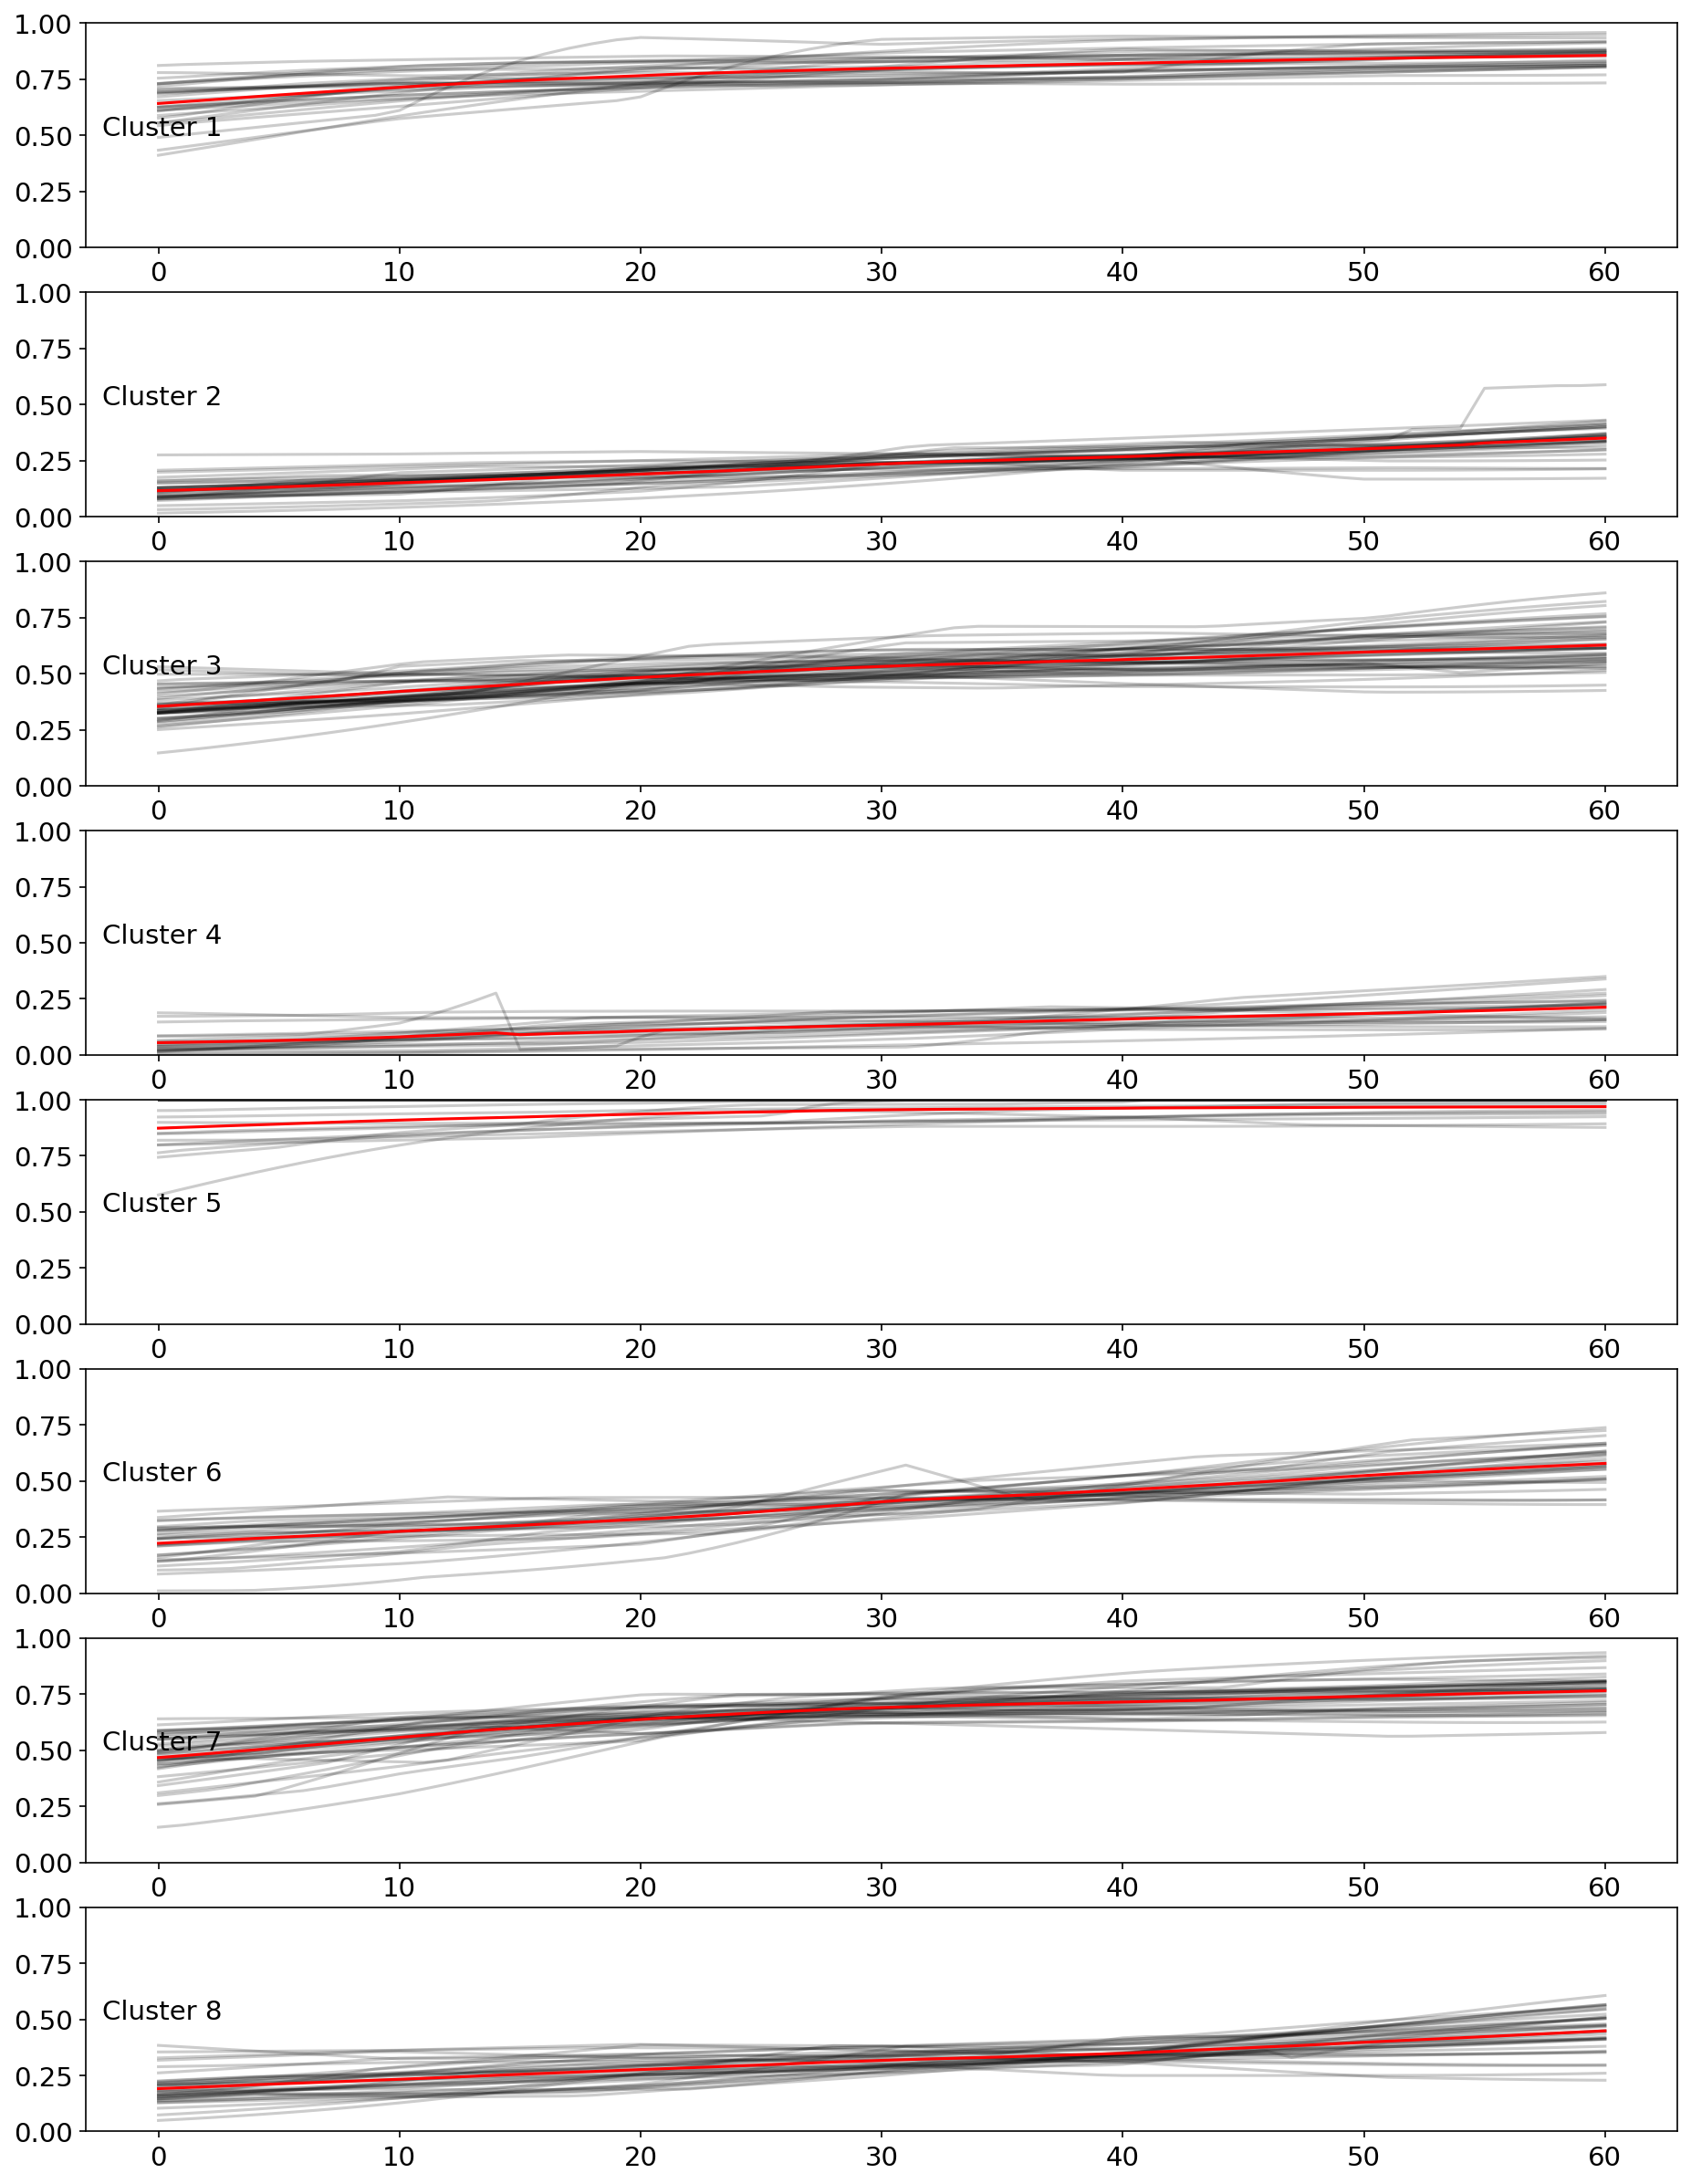

In [39]:
# Population Growth

mpl.rcParams["figure.figsize"] = (15,20) #change figure size, (x, y)
y_pred_X_euclideanKM_urban_population = euclideanKMeans(8, seed, X_train_urban_population)

Euclidean k-means
0.068 --> 0.058 --> 0.057 --> 0.056 --> 0.056 --> 0.056 --> 0.056 --> 0.056 --> 0.056 --> 0.056 --> 
Euclidean k-means Chart


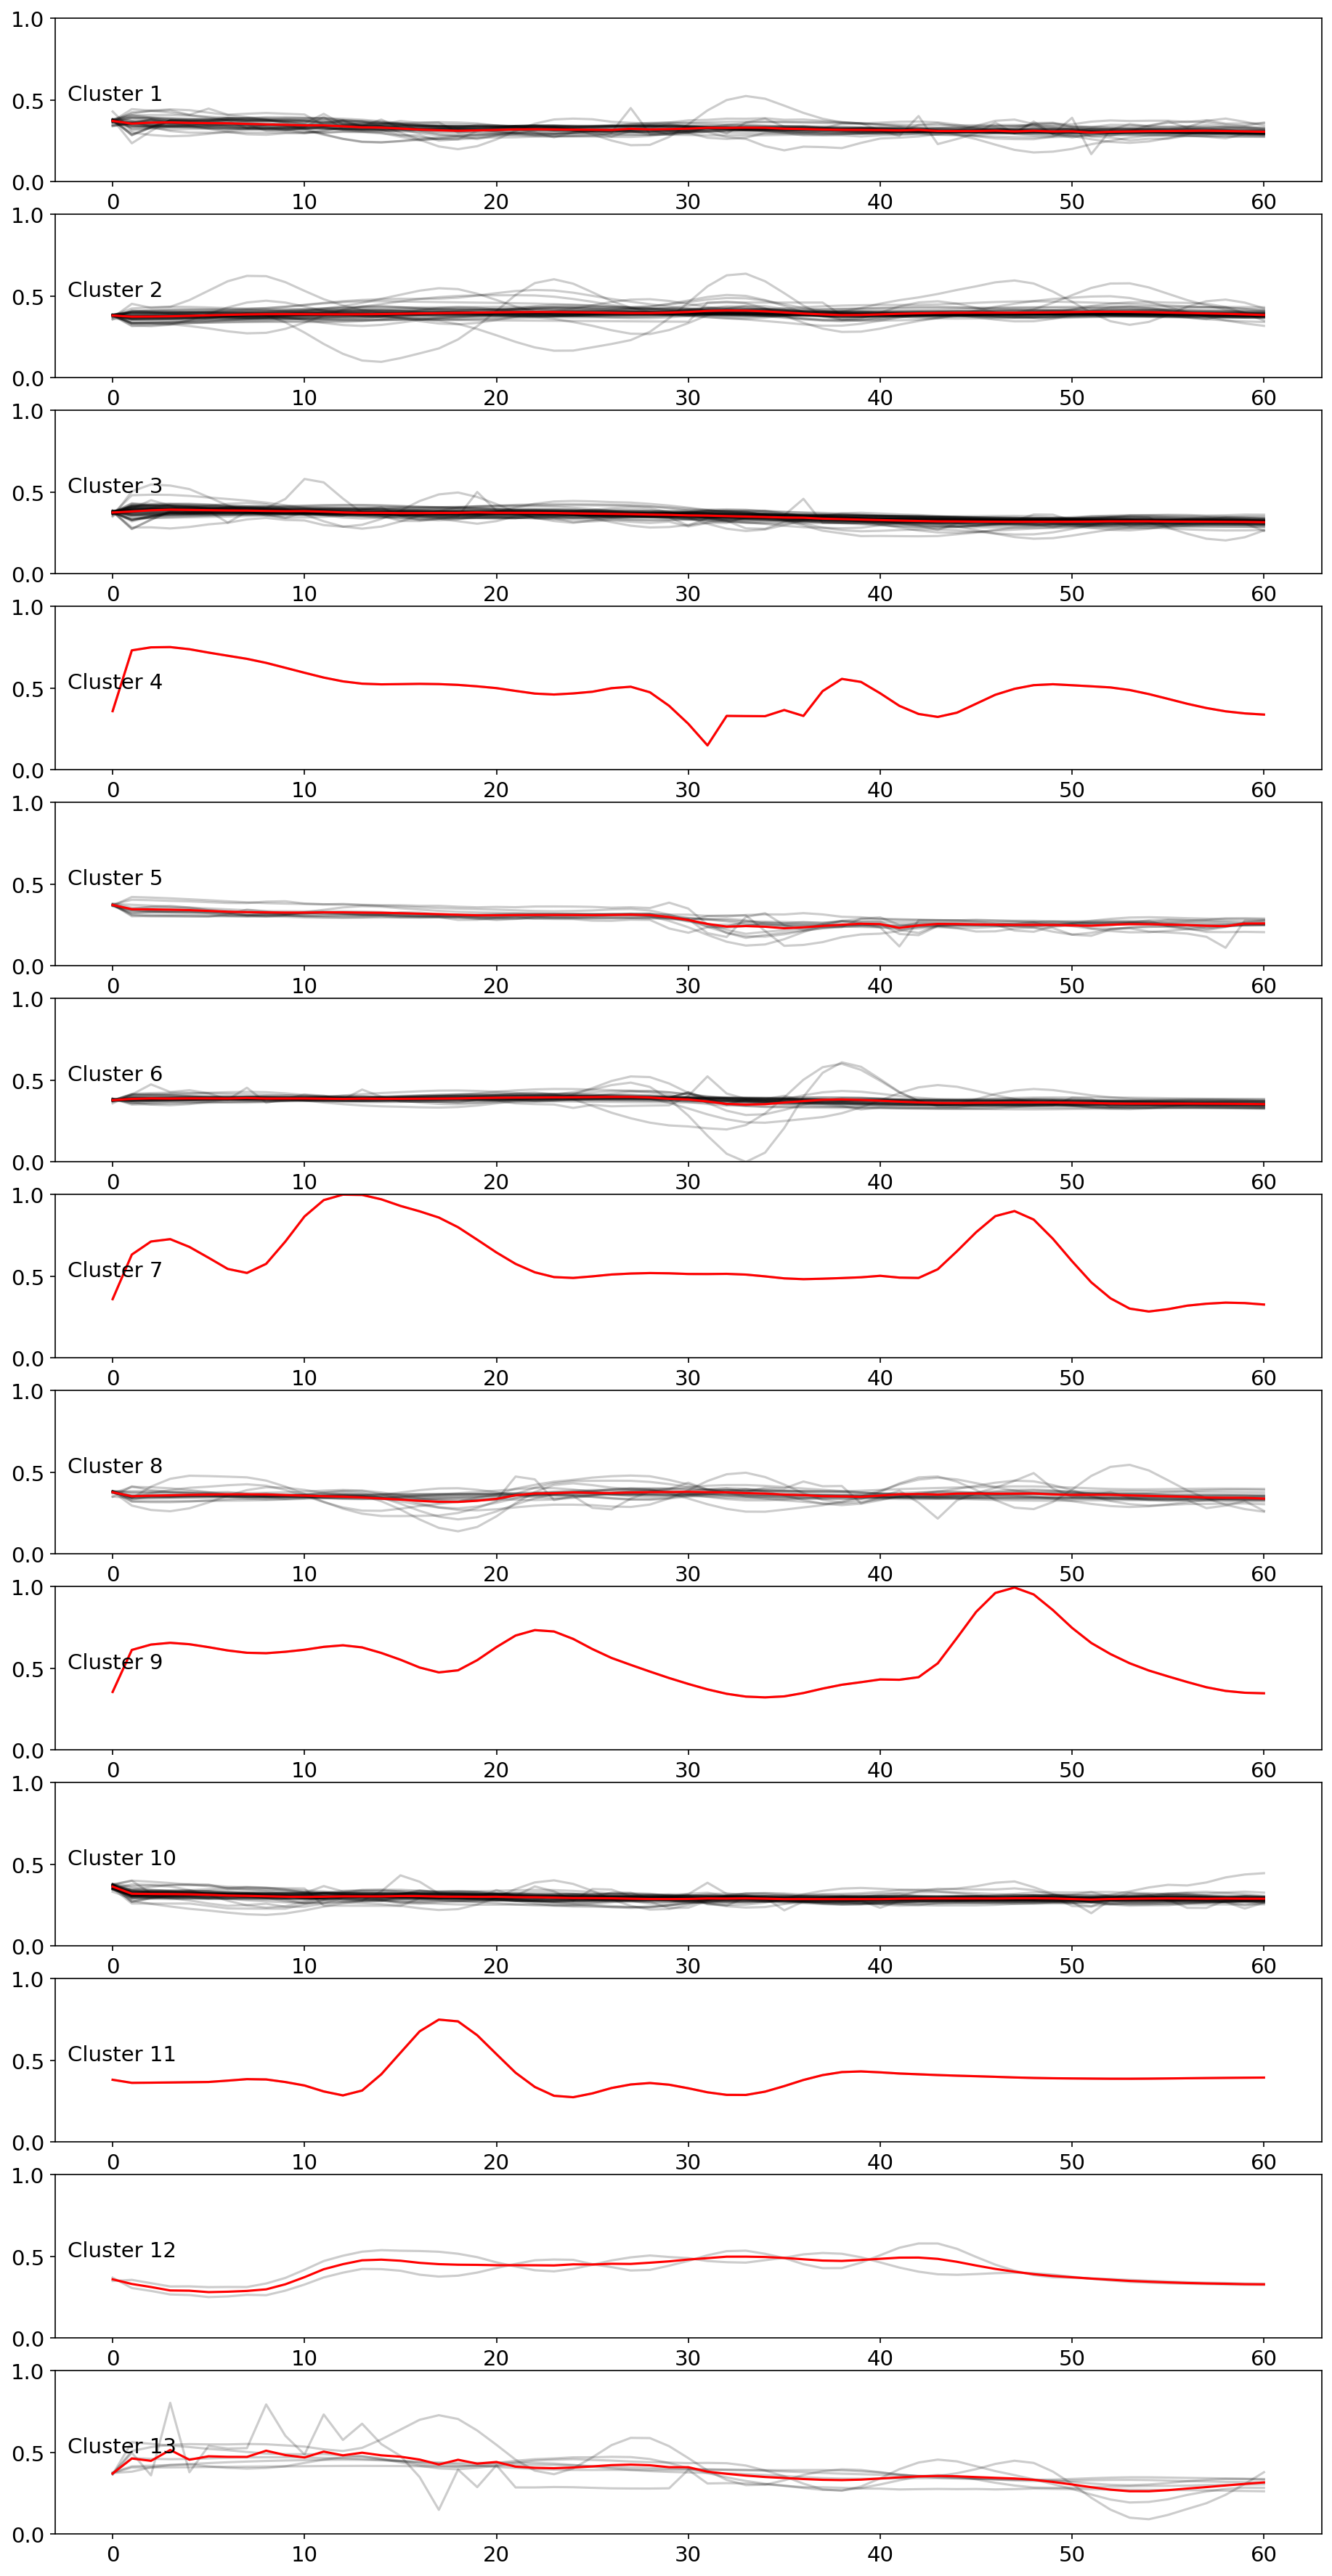

In [46]:
# Population Growth

mpl.rcParams["figure.figsize"] = (15,30) #change figure size, (x, y)
y_pred_X_euclideanKM_population_growth = euclideanKMeans(13, seed, X_train_population_growth)

Euclidean k-means
0.006 --> 0.004 --> 0.004 --> 
Euclidean k-means Chart


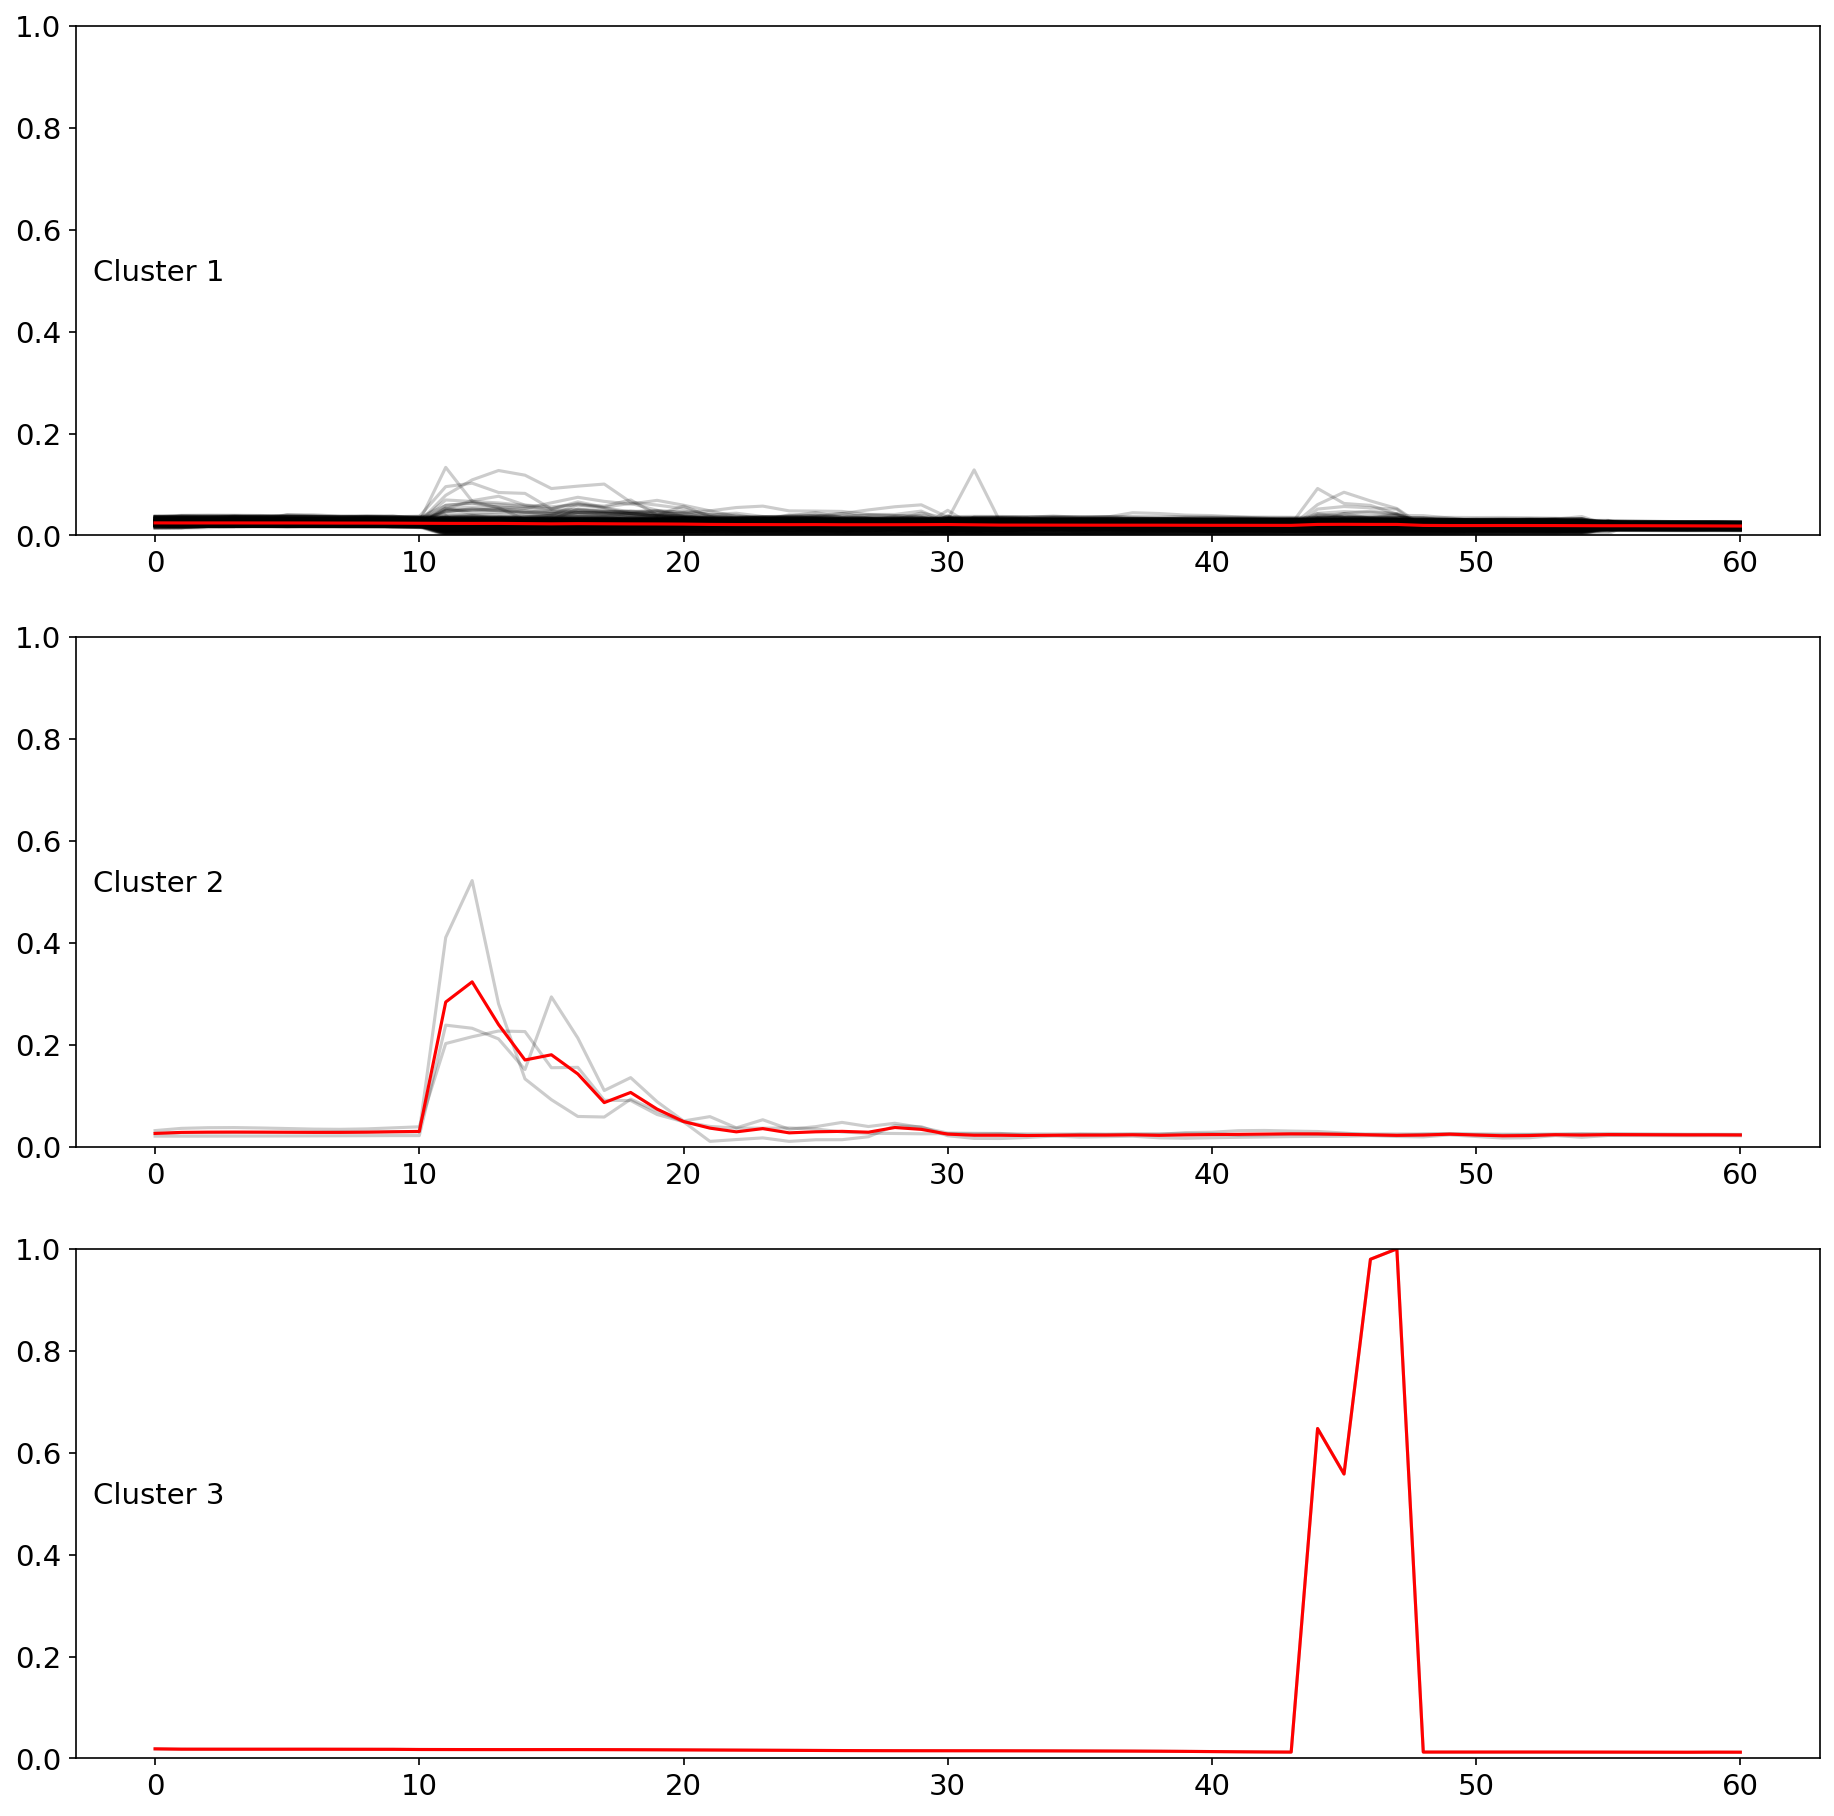

In [41]:
# co2 intensity

mpl.rcParams["figure.figsize"] = (15,15) #change figure size, (x, y)
y_pred_X_euclideanKM_co2_intensity = euclideanKMeans(3, seed, X_train_co2_intensity)

Euclidean k-means
0.068 --> 0.048 --> 0.048 --> 
Euclidean k-means Chart


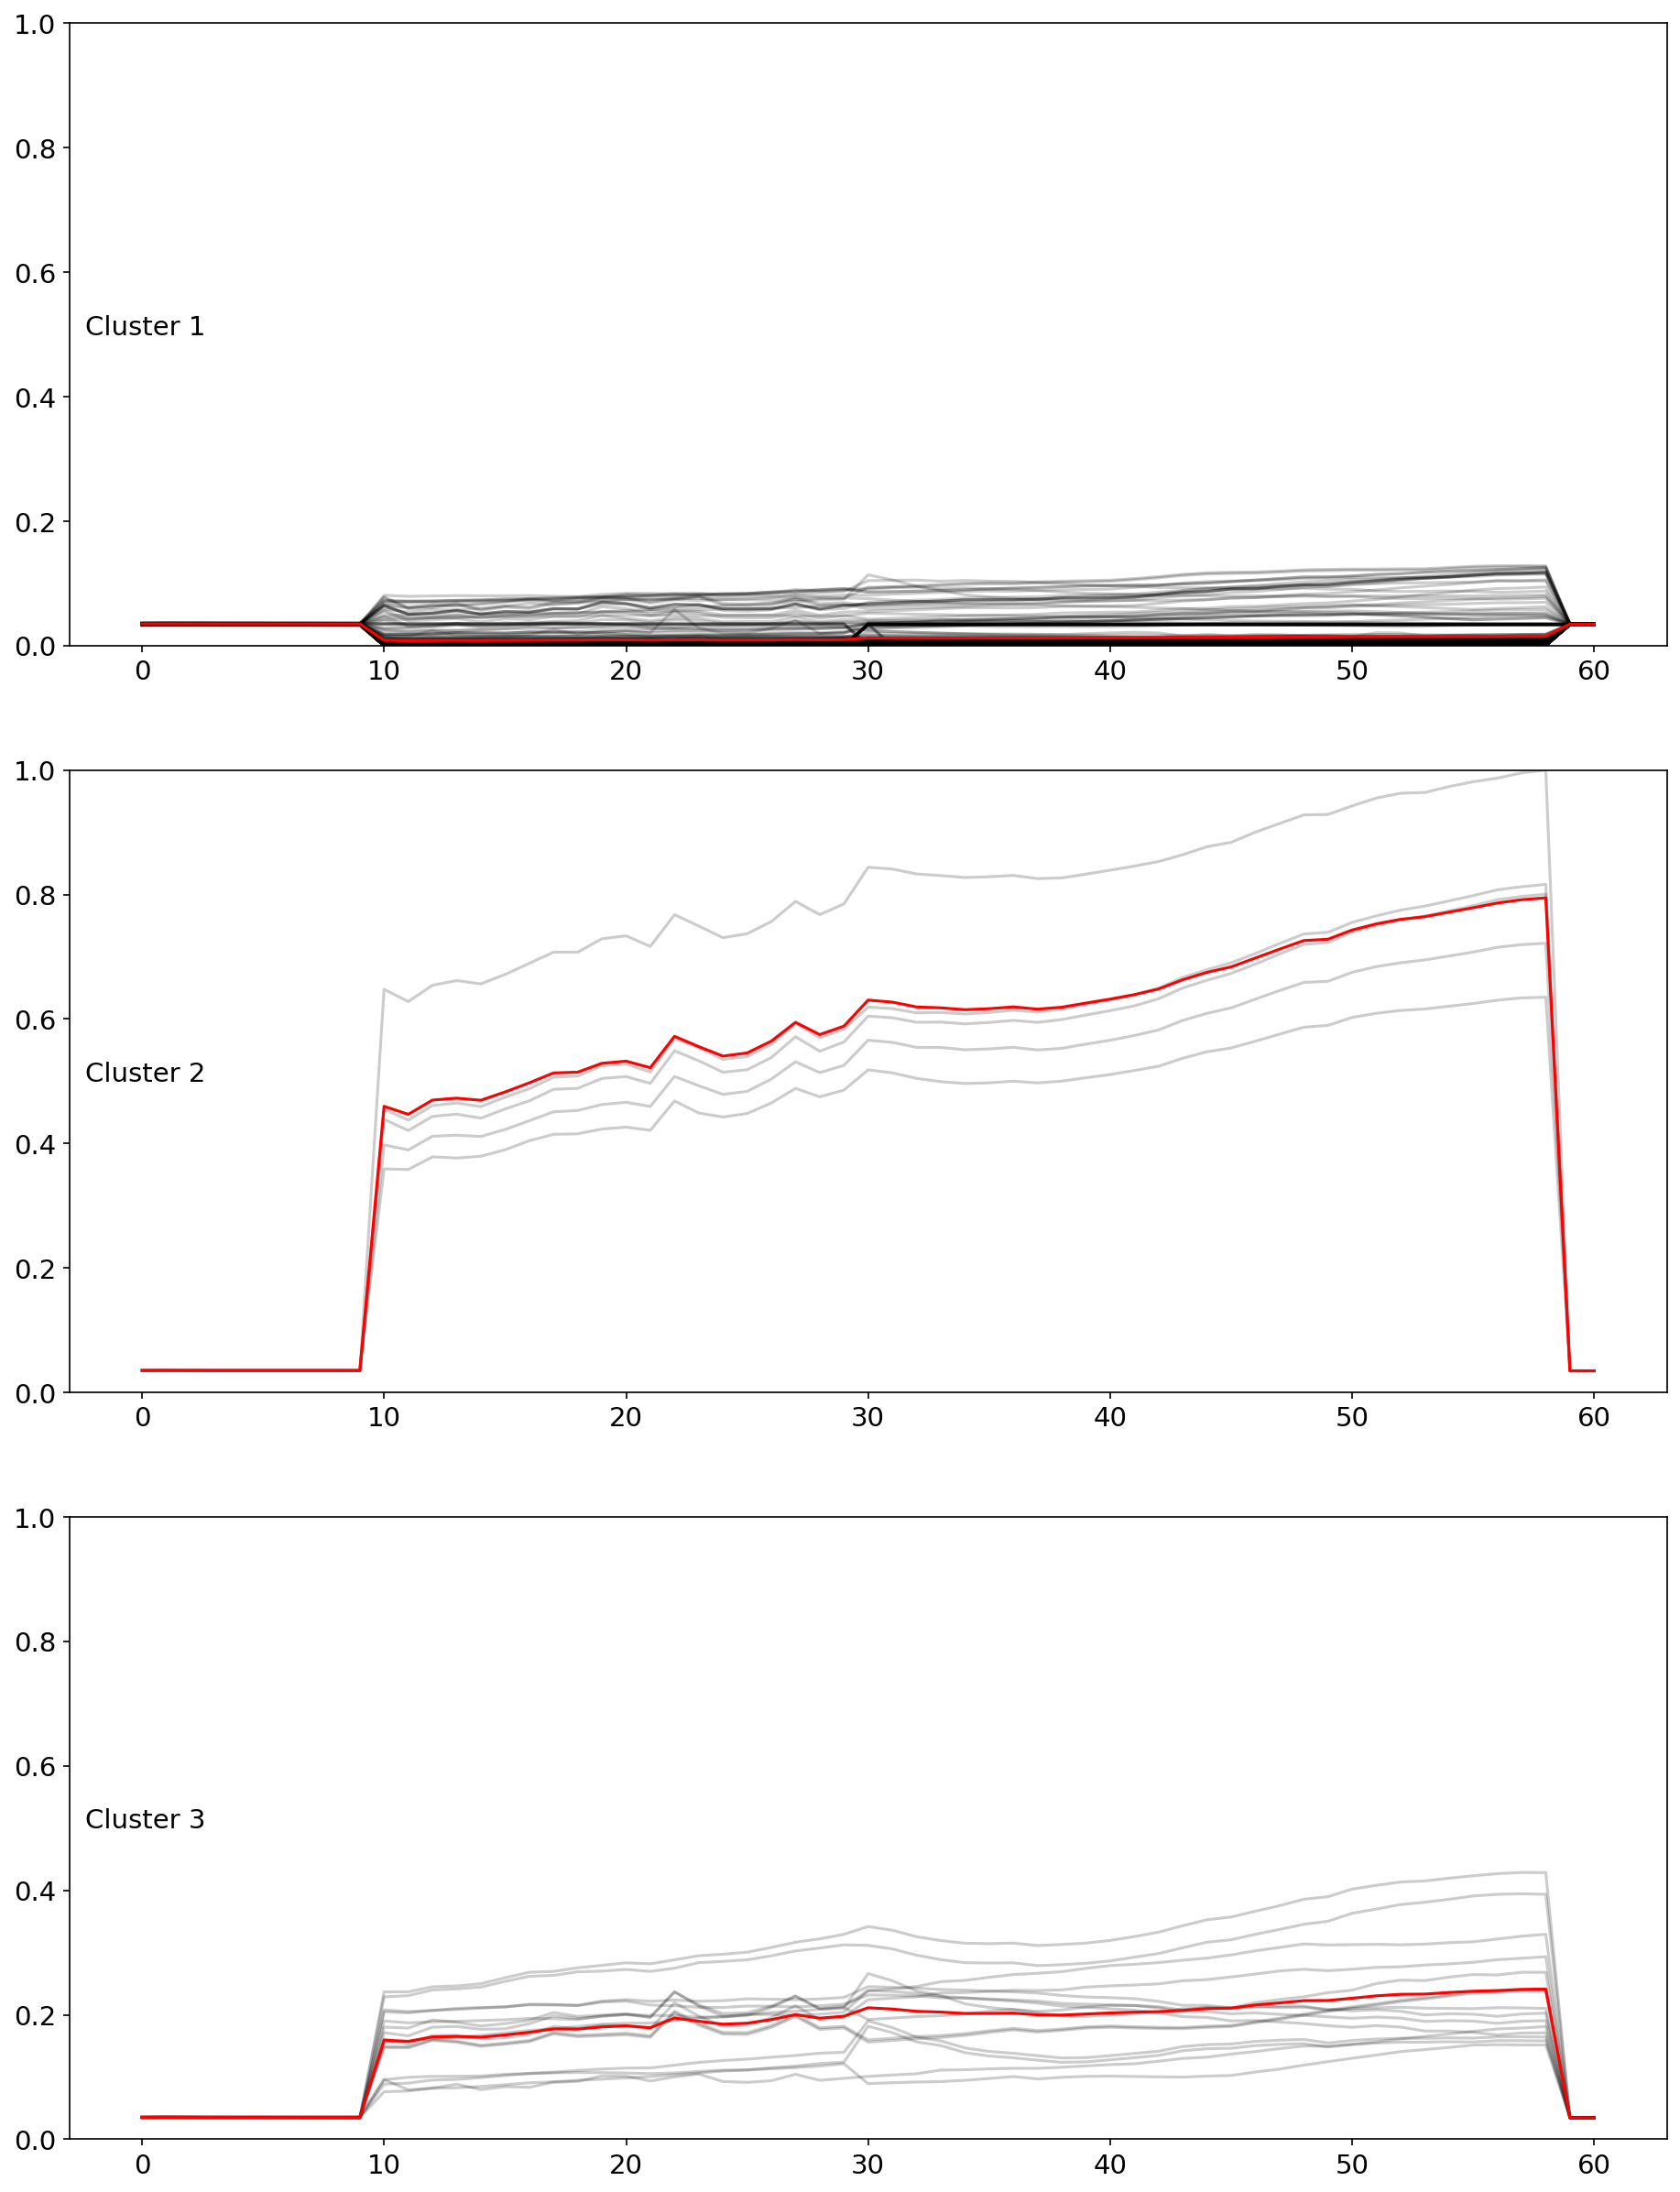

In [50]:
# Methane Emissions

mpl.rcParams["figure.figsize"] = (15,20) #change figure size, (x, y)
y_pred_X_euclideanKM_methane_emissions = euclideanKMeans(3, seed, X_train_methane_emissions)

Euclidean k-means
0.082 --> 0.063 --> 0.061 --> 0.061 --> 0.061 --> 
Euclidean k-means Chart


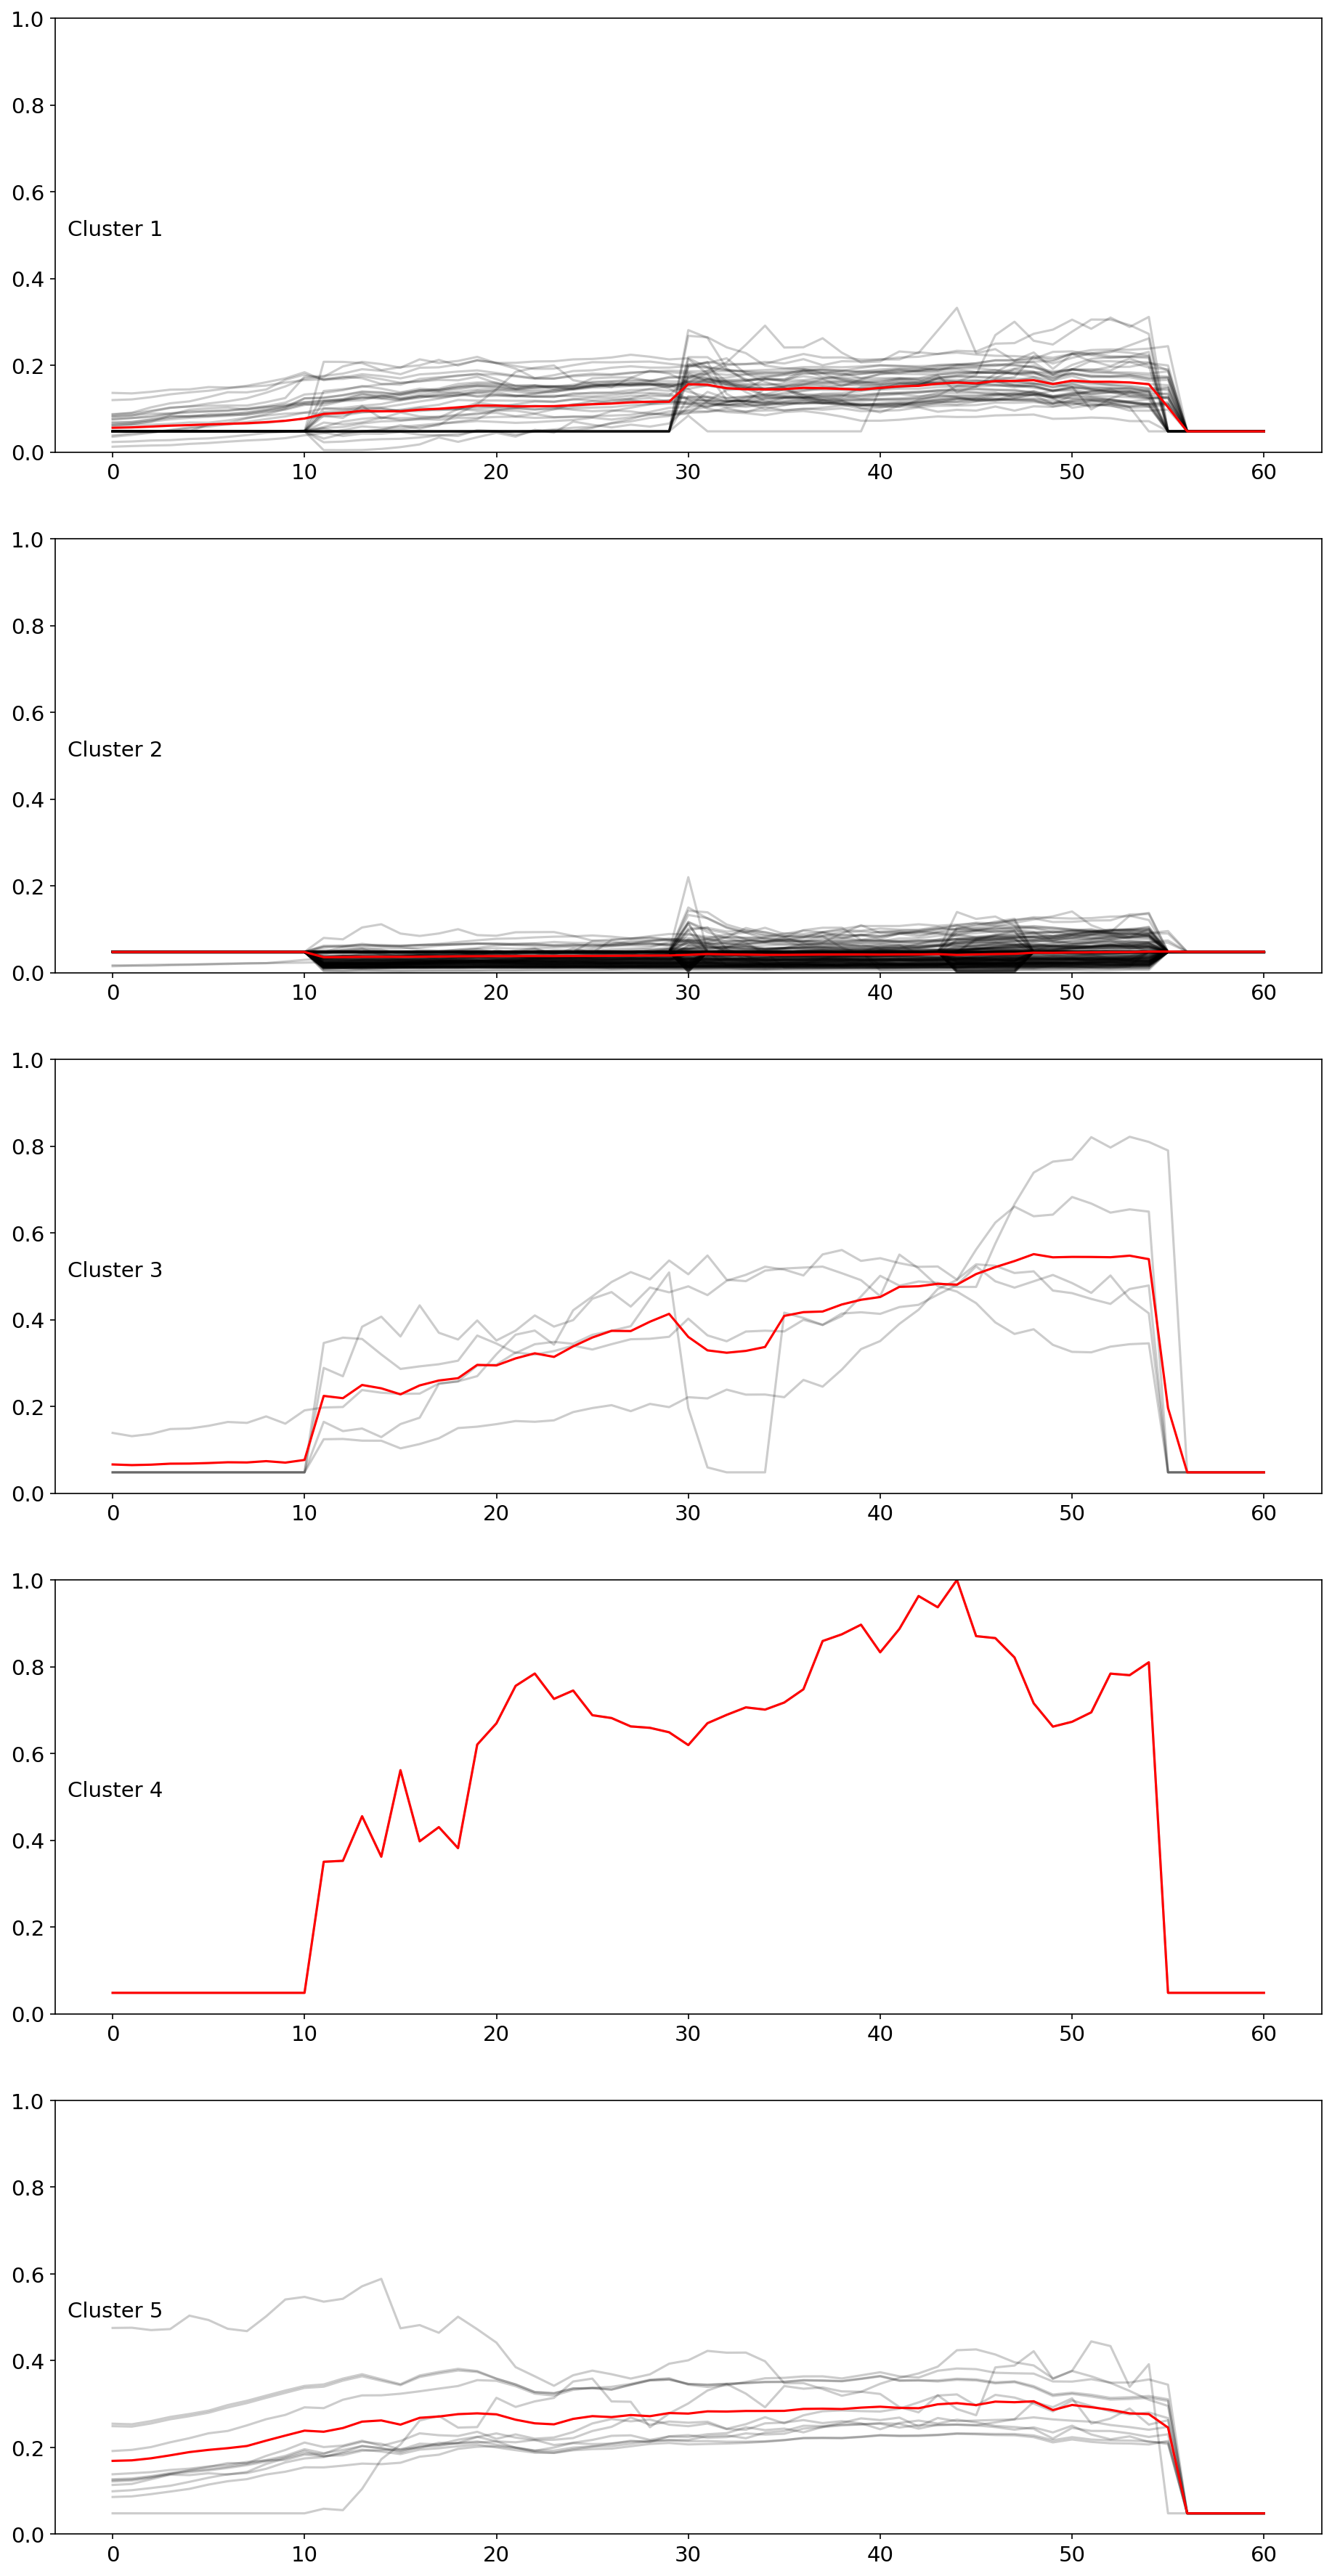

In [56]:
mpl.rcParams["figure.figsize"] = (15,30) #change figure size, (x, y)
y_pred_X_euclideanKM_energy_use = euclideanKMeans(5, seed, X_train_energy_use)

## EDA for Clustering

In [25]:
y_pred_X_euclideanKM_co2_intensity

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [57]:
# get all cluster name
cluster_result_euclideanKM_urban_population = mergeClusterNames(y_pred_X_euclideanKM_urban_population, country_name)
cluster_result_euclideanKM_population_growth = mergeClusterNames(y_pred_X_euclideanKM_population_growth, country_name)
cluster_result_euclideanKM_methane_emissions = mergeClusterNames(y_pred_X_euclideanKM_methane_emissions, country_name)
cluster_result_euclideanKM_co2_intensity = mergeClusterNames(y_pred_X_euclideanKM_co2_intensity, country_name)
cluster_result_euclideanKM_energy_use = mergeClusterNames(y_pred_X_euclideanKM_energy_use, country_name)

In [68]:
# Clusters that require attention

# urban population - cluster 1, 5
# population growth - cluster 4, 7, 9, 11, 12, 13
# co2 intensity - cluster 2, 3
# methane_emissions - cluster 2, 3
# energy use - cluster 3, 4, 5

cluster_result_euclideanKM_urban_population_1 = getSingleCluster(cluster_result_euclideanKM_urban_population, 1)
cluster_result_euclideanKM_urban_population_2 = getSingleCluster(cluster_result_euclideanKM_urban_population, 2)

cluster_result_euclideanKM_co2_intensity_2 = getSingleCluster(cluster_result_euclideanKM_co2_intensity, 2)
cluster_result_euclideanKM_co2_intensity_3 = getSingleCluster(cluster_result_euclideanKM_co2_intensity, 3)

cluster_result_euclideanKM_methane_emissions_2 = getSingleCluster(cluster_result_euclideanKM_methane_emissions, 2)
cluster_result_euclideanKM_methane_emissions_3 = getSingleCluster(cluster_result_euclideanKM_methane_emissions, 3)

cluster_result_euclideanKM_energy_use_2 = getSingleCluster(cluster_result_euclideanKM_energy_use, 2)
cluster_result_euclideanKM_energy_use_3 = getSingleCluster(cluster_result_euclideanKM_energy_use, 3)

In [63]:
# # select cluster 2 for EDA
# cluster_name_co2_intensity_2 = cluster_result_euclideanKM_co2_intensity_2.index.tolist()

# def get_df_viz(df_source, indicatorName):
#     df_viz = df_source.reset_index()
#     df_viz = df_viz[df_viz['Indicator Name']==indicatorName]
#     df_viz = df_viz[df_viz['Country Name'].isin(cluster_name_co2_intensity_2)]
#     return df_viz
    
# df_viz_co2_intensity = get_df_viz(df_worldbank_transposed, feat_list[3])
# df_viz_co2_intensity.drop(columns=['index', 'Indicator Name'], inplace=True)
# df_viz_co2_intensity

In [69]:
display(cluster_result_euclideanKM_urban_population_1)
display(cluster_result_euclideanKM_urban_population_2)
display(cluster_result_euclideanKM_co2_intensity_2)
display(cluster_result_euclideanKM_co2_intensity_3)
display(cluster_result_euclideanKM_methane_emissions_2)
display(cluster_result_euclideanKM_methane_emissions_3)
display(cluster_result_euclideanKM_energy_use_2)
display(cluster_result_euclideanKM_energy_use_3)

cluster
United Arab Emirates             0
Argentina                        0
American Samoa                   0
Australia                        0
Bahamas, The                     0
Canada                           0
Switzerland                      0
Chile                            0
Germany                          0
Denmark                          0
Spain                            0
Finland                          0
France                           0
United Kingdom                   0
Greenland                        0
Guam                             0
High income                      0
Japan                            0
Lebanon                          0
Luxembourg                       0
North America                    0
New Zealand                      0
OECD members                     0
Puerto Rico                      0
Post-demographic dividend        0
Sweden                           0
United States                    0
Venezuela, RB                    0
Virgin Islands (U.S.)            0

cluster
Africa Eastern and Southern                         1
Bangladesh                                          1
Bhutan                                              1
Comoros                                             1
Eritrea                                             1
Micronesia, Fed. Sts.                               1
Guinea                                              1
Guinea-Bissau                                       1
Guyana                                              1
Heavily indebted poor countries (HIPC)              1
IDA total                                           1
IDA only                                            1
India                                               1
St. Lucia                                           1
Least developed countries: UN classification        1
Low income                                          1
Madagascar                                          1
Maldives                                            1
Mali                                                1
Myanmar                                             1
Mozambique                                          1
Pre-demographic dividend                            1
South Asia                                          1
Sudan                                               1
Sub-Saharan Africa (excluding high income)          1
Sub-Saharan Africa                                  1
Togo                                                1
Timor-Leste                                         1
Tonga                                               1
South Asia (IDA & IBRD)                             1
Sub-Saharan Africa (IDA & IBRD countries)           1
Vietnam                                             1
Yemen, Rep.                                         1
Zimbabwe                                            1

cluster
United Arab Emirates        1
Brunei Darussalam           1
Oman                        1

cluster
Lesotho        2

cluster
IBRD only                  1
IDA & IBRD total           1
Low & middle income        1
Middle income              1
World                      1

cluster
China                                                2
East Asia & Pacific (excluding high income)          2
Early-demographic dividend                           2
East Asia & Pacific                                  2
Europe & Central Asia (excluding high income)        2
Europe & Central Asia                                2
High income                                          2
IDA total                                            2
Lower middle income                                  2
Late-demographic dividend                            2
OECD members                                         2
Post-demographic dividend                            2
East Asia & Pacific (IDA & IBRD countries)           2
Europe & Central Asia (IDA & IBRD countries)         2
Upper middle income                                  2

cluster
Aruba                              1
Africa Eastern and Southern        1
Afghanistan                        1
Africa Western and Central         1
Angola                             1
...                              ...
World                              1
Samoa                              1
Yemen, Rep.                        1
Zambia                             1
Zimbabwe                           1

[193 rows x 1 columns]

cluster
United Arab Emirates        2
Bahrain                     2
Iceland                     2
Kuwait                      2
Trinidad and Tobago         2

In [62]:
# select cluster for EDA

def get_df_viz_original(df_source, indicatorName, countryName):
    df_viz = df_source.reset_index()
    df_viz = df_viz[df_viz['Indicator Name']==indicatorName]
    df_viz = df_viz[df_viz['Country Name'].isin(countryName)]
    return df_viz
    
def get_cluster_dataframe():
    df_viz

country_list = cluster_result_euclideanKM_co2_intensity_2.index.tolist()
    
df_viz_co2_intensity = get_df_viz_original(df_worldbank_transposed, feat_list[3], country_list)
# df_viz_co2_intensity.drop(columns=['index', 'Indicator Name'], inplace=True)
# df_viz_co2_intensity

df_viz_co2_intensity

0    index          Country Name  \
43      43  United Arab Emirates   
158    158     Brunei Darussalam   
878    878                  Oman   

0                                       Indicator Name       1960       1961  \
43   CO2 intensity (kg per kg of oil equivalent ene...  0.0320916   0.036478   
158  CO2 intensity (kg per kg of oil equivalent ene...  0.0263557   0.028059   
878  CO2 intensity (kg per kg of oil equivalent ene...  0.0212102  0.0211172   

0         1962       1963       1964       1965       1966  ...       2011  \
43   0.0377608  0.0379857  0.0372123  0.0361319  0.0350155  ...  0.0250604   
158  0.0281678  0.0283258  0.0285451  0.0287986  0.0290503  ...  0.0175461   
878  0.0212208  0.0213255  0.0214363  0.0215537  0.0216953  ...  0.0230657   

0         2012       2013       2014       2015       2016       2017  \
43   0.0249087  0.0255136  0.0252878  0.0238228  0.0240557   0.024129   
158  0.0180461  0.0223693  0.0190115  0.0224848  0.0223261  0.0221793   
878  0.0240163  0.0241966    0.02569  0.0263994   0.025831  0.0253655   

0         2018       2019       2020  
43   0.0241202  0.0241638  0.0238982  
158  0.0220289  0.0221384  0.0219978  
878  0.0249653  0.0249064  0.0246629  

[3 rows x 64 columns]

In [29]:
#
# pivot function 3
#

# function to slice out country from the df
# and transpose the data to become year-column format
# specially design for clustering function
def get_pivot_data_year_column_cluster(df, country_name, indicatorName, columnsToDrop=[]):
    df_country = df[df['Country Name'] == country_name].copy()
    if len(df_country) == 0:
        return 0 # country name does not exist
    
    # get ready to transpose
    df_country.drop(columns=columnsToDrop, inplace=True)
    df_country.reset_index(inplace=True, drop=True) 
    
    # transpose
    df_country = df_country.transpose()
    
    # rename header
    df_country.rename(columns={0: f'{indicatorName}'}, inplace=True)
    df_country.reset_index(inplace=True)
    df_country.rename(columns={0: 'Year'}, inplace=True)
    
    # reset year column type to int and others to float
    df_country['Year'] = df_country['Year'].astype('int32')
    headers = df_country.columns.tolist()[1:] # all headers except 'Year'
    for h in headers:
        df_country[h] = df_country[h].apply(pd.to_numeric, errors='coerce')
    
    # add country name column back and reposition it to first column
    df_country['Country Name'] = country_name
    cols = df_country.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_country = df_country[cols]
        
    return df_country

In [66]:
#
# Transpose dataset
#

# # define countries, years and columns
# countries = df_viz_co2_intensity['Country Name'].unique().tolist()
# columnsName = ['Country Name', 'Year', 'CO2 intensity (kg per kg of oil equivalent energy use)']

# # loop the entire dataset and transpose all countries
# df_viz_co2_intensity_transposed = pd.DataFrame([], columns=columnsName)
# for country in countries:
#     df_temp = get_pivot_data_year_column_cluster(df_viz_co2_intensity, country, columnsName[2], ['Country Name'])
#     df_viz_co2_intensity_transposed = pd.concat([df_viz_co2_intensity_transposed, df_temp], axis=0)#, ignore_index=True)
    
# # final result
# df_viz_co2_intensity_transposed

In [31]:
fig = px.line(df_viz_co2_intensity_transposed, 
              x="Year", 
              y=columnsName[2], 
              color='Country Name')
fig.show()